<a id='top'></a>
# NIRSpec NIRCam datacubes regions extraction
---
**Author**: Lina Issa (lina.issa@irap.omp.eu) 

**Latest Update**: 31 october 2022

This notebook needs the functions **cut_nirspec_cube** and **extract_nircam_sub_image** to be imported from prepare_NIRcam_NIRSpec_data.py 


In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import mpdaf
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
from astropy.table import Table
import webbpsf
import os
import time
from prepare_NIRcam_NIRSpec_data import cut_nirspec_cube, extract_nircam_sub_image
import matplotlib.pyplot as plt 
from astropy.utils.data import get_pkg_data_filename

from sklearn.preprocessing import StandardScaler 



(8.873915833333333, 345.81504291666664)


NIRSpec Subcube

In [2]:
directory    = './datacubes_corrected/'
nirspec_cube = 'NIRSpec_170lp_clean_wcs_corrected_flux_calibrated.fits'
center_proplyd = (-5.4182020,83.8347078) # in degrees (dec,ra)
radius_proplyd = 2.5# in arcsec 

In [3]:
cut_nirspec_cube(directory, nirspec_cube, center_proplyd, radius_proplyd)

Set OBSGEO-B to    -8.426229 from OBSGEO-[XYZ].
Set OBSGEO-H to 1396105430.300 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


NIRCam 

In [4]:
# proplyd in detector B 
directory_Nircam = '/Users/lina/Documents/Thesis/NirCam_Images/OrionBar_NIRCAM_Final_mocaics_Boris_aligned_corrected_10Oct22/'
filters = ['F140M', 'F335M', 'F182M', 'F480M','F187N','F210M','F212N','F277W','F300M']
nircam_images = ['Level3_CLEAR-F140M-B_i2d.fits',  'Level3_CLEAR-F335M-B_i2d.fits',
                 'Level3_CLEAR-F182M-B_i2d.fits',  'Level3_CLEAR-F480M-B_i2d.fits',
                 'Level3_CLEAR-F187N-B_i2d.fits',  #'Level3_F162M-F150W2-B_i2d.fits',
                 'Level3_CLEAR-F210M-B_i2d.fits',  #'Level3_F164N-F150W2-B_i2d.fits',
                 'Level3_CLEAR-F212N-B_i2d.fits',  #'Level3_F323N-F322W2-B_i2d.fits',
                 'Level3_CLEAR-F277W-B_i2d.fits',  #'Level3_F405N-F444W-B_i2d.fits', 
                 'Level3_CLEAR-F300M-B_i2d.fits']  #'Level3_F470N-F444W-B_i2d.fits' ]

In [5]:
for i in range(len(filters)):
    extract_nircam_sub_image(directory_Nircam, nircam_images[i], center_proplyd, radius_proplyd, filters[i] )

Set OBSGEO-B to    -8.611515 from OBSGEO-[XYZ].
Set OBSGEO-H to 1397997571.500 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.656112 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398453548.128 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.627345 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398159392.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.637415 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398262356.337 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.651798 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398409430.090 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.595681 from OBSGEO-[XYZ].
Set OBSGEO-H to 1397835725.874 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.656112 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398453548.128 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.603599 from OBSGEO-[XYZ].
Set OBSGEO-H to 1397916651.742 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


Set OBSGEO-B to    -8.627345 from OBSGEO-[XYZ].
Set OBSGEO-H to 1398159392.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


In [6]:
extract_nircam_sub_image(directory_Nircam, nircam_images[0], center_proplyd, radius_proplyd, filters[0] )

Set OBSGEO-B to    -8.611515 from OBSGEO-[XYZ].
Set OBSGEO-H to 1397997571.500 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


success


In [7]:
bands = 3663
wavelength   = np.linspace(1.69997, 3.15, bands)
print(wavelength[3295])

3.004680226652103


In [10]:
cube_nircam_file = get_pkg_data_filename(directory_Nircam + 'NIRCam_F182M.fits')
cube_nircam_data = fits.getdata(cube_nircam_file, ext=1) 


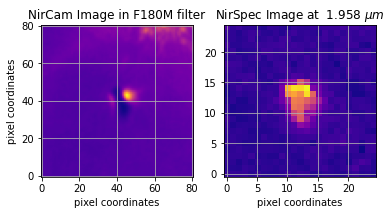

In [13]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cube_nircam_data, cmap='plasma', origin='lower')
ax[0].set_xlabel("pixel coordinates")
ax[0].set_ylabel("pixel coordinates")
ax[0].grid()
ax[0].set_title('NirCam Image in F180M filter')

ax[1].imshow(cube_nirspec_data[652], cmap='plasma', origin='lower')
ax[1].set_xlabel("pixel coordinates")
ax[1].grid()
ax[1].set_title(f'NirSpec Image at  {wavelength[652]:.3f} $\mu m$')
plt.savefig('plots/comparaison_proplyd_F182M.pdf')

In [12]:
cube_nirspec_file = get_pkg_data_filename(directory + 'NIRSpec_subcube.fits')
cube_nirspec_data = fits.getdata(cube_nirspec_file, ext=1) 

mean_nirspec_image_182 = np.mean(cube_nirspec_data[0:1000], axis=0)

In [14]:
mean_nirspec_image_182[0:655].shape

(25, 25)

Text(0.5, 1.0, 'NirSpec Image at  1.958 $\\mu m$')

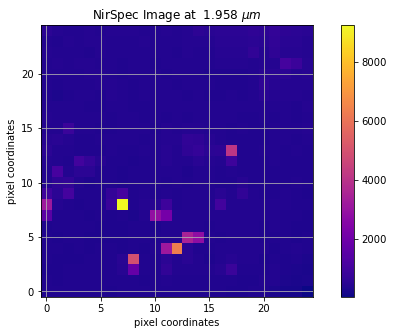

In [15]:
plt.figure(figsize=(10,5))
plt.imshow(mean_nirspec_image_182, cmap='plasma', origin='lower')
plt.xlabel("pixel coordinates")
plt.ylabel("pixel coordinates")
plt.colorbar()
plt.grid()
plt.title(f'NirSpec Image at  {wavelength[652]:.3f} $\mu m$')

In [16]:
cube_nircam_file = get_pkg_data_filename(directory_Nircam + 'NIRCam_F300M.fits')
cube_nircam_data = fits.getdata(cube_nircam_file, ext=1) 



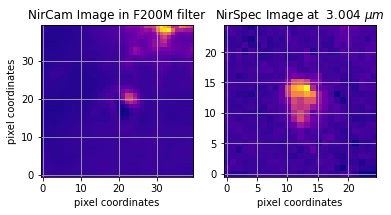

In [17]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cube_nircam_data, cmap='plasma', origin='lower')
ax[0].set_xlabel("pixel coordinates")
ax[0].set_ylabel("pixel coordinates")
ax[0].grid()
ax[0].set_title('NirCam Image in F200M filter')

ax[1].imshow(cube_nirspec_data[3294], cmap='plasma', origin='lower')
ax[1].set_xlabel("pixel coordinates")
ax[1].grid()
ax[1].set_title(f'NirSpec Image at  {wavelength[3294]:.3f} $\mu m$')
plt.savefig('plots/comparaison_proplyd_F200M.pdf')